# Install lib and import

In [56]:
!pip install ucimlrepo

In [57]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from sklearn.model_selection import train_test_split

#**Data Exploration**

In [58]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dow_jones_index = fetch_ucirepo(id=312)

# data (as pandas dataframes)
X = dow_jones_index.data.features
y = dow_jones_index.data.targets


In [59]:
X.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,97,0.175029


In [60]:
y.head()

,percent_change_next_weeks_price
0,-4.428490
1,-2.470660
2,1.638310
3,5.933250
4,0.230814


In [61]:
# Merge X and y into 1 Dataframe
df = pd.concat([X, y], axis = 1)

In [62]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,26,0.182704,-4.428490
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,19,0.187852,-2.470660
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,12,0.189994,1.638310
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5,0.185989,5.933250
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,97,0.175029,0.230814


In [63]:
num_observation = df.shape[0]
print("Number of observations: ", num_observation)

Number of observations:  750


In [64]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          quarter        volume  percent_change_price  \
count  750.000000  7.500000e+02            750.000000   
mean     1.520000  1.175478e+08              0.050262   
std      0.499933  1.584381e+08              2.517809   
min      1.000000  9.718851e+06            -15.422900   
25%      1.000000  3.086624e+07             -1.288053   
50%      2.000000  5.306088e+07              0.000000   
75%      2.000000  1.327218e+08              1.650888   
max      2.000000  1.453439e+09              9.882230   

       percent_change_volume_over_last_wk  previous_weeks_volume  \
count                          720.000000           7.200000e+02   
mean                             5.593627           1.173876e+08   
std                             40.543478           1.592322e+08   
min                            -61.433175           9.718851e+06   
25%                            -19.804284           3.067832e+07   
50%                              0.512586           5

In [65]:
print('Missing data:')
print(df.isna().sum())

Missing data:
quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
days_to_next_dividend                  0
percent_return_next_dividend           0
percent_change_next_weeks_price        0
dtype: int64


In [66]:
print("\nColumn Descriptions:")
print(df.dtypes)


Column Descriptions:
quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
days_to_next_dividend                   int64
percent_return_next_dividend          float64
percent_change_next_weeks_price       float64
dtype: object


In [67]:
# Clear all `$` symbol
def standardize_price(str_in):
  str_in = str_in.strip()
  str_in = str_in.replace('$','')
  str_in = str_in.strip()
  output = float(str_in)
  return output

In [68]:
col = ['low', 'high', 'close','open','next_weeks_open','next_weeks_close']
for i in col:
  df[i] = df[i].apply(standardize_price)

In [69]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,26,0.182704,-4.428490
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,19,0.187852,-2.470660
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,12,0.189994,1.638310
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5,0.185989,5.933250
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,97,0.175029,0.230814


In [70]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          quarter        open        high         low       close  \
count  750.000000  750.000000  750.000000  750.000000  750.000000   
mean     1.520000   53.651840   54.669987   52.640160   53.729267   
std      0.499933   32.638852   33.215994   32.119277   32.788787   
min      1.000000   10.590000   10.940000   10.400000   10.520000   
25%      1.000000   29.830000   30.627500   28.720000   30.365000   
50%      2.000000   45.970000   46.885000   44.800000   45.930000   
75%      2.000000   72.715000   74.287500   71.037500   72.667500   
max      2.000000  172.110000  173.540000  167.820000  170.580000   

             volume  percent_change_price  percent_change_volume_over_last_wk  \
count  7.500000e+02            750.000000                          720.000000   
mean   1.175478e+08              0.050262                            5.593627   
std    1.584381e+08              2.517809                           40.543478   
min    9.718851e+06          

In [71]:
# Filling the missing values with median of each type of stock.
df['percent_change_volume_over_last_wk'] = df.groupby('stock')['percent_change_volume_over_last_wk'].transform(
    lambda x: x.fillna(x.median())
)
df['previous_weeks_volume'] = df.groupby('stock')['previous_weeks_volume'].transform(
    lambda x: x.fillna(x.median())
)

In [72]:
# Convert from numeric value to discrete value
# of attributes 'percent_change_price', 'percent_change_next_weeks_price' and 'percent_change_volume_over_last_wk'
# Store them into 'PriceChange', 'MarketTrend', 'VolumeChange'
def categorize_change(value):
    """Categorizes percentage change into 'Up', 'Down', 'Stab;e'."""
    if value < -1.5:
        return 'Down'
    elif value > 1.5:
        return 'Up'
    else:
        return 'Stable'

# Apply categorization
df['PriceChange'] = df['percent_change_price'].apply(categorize_change)
df['VolumeChange'] = df['percent_change_volume_over_last_wk'].apply(categorize_change)


In [73]:
def categorize_market_trend(value):
    """Categorizes market trend into 'Bearish', 'Bullish', 'Neutral'."""
    if value < -1.5:
        return 'Bearish'
    elif value > 1.5:
        return 'Bullish'
    else:
      return 'Neutral'

df['MarketTrend'] = df['percent_change_next_weeks_price'].apply(categorize_market_trend)


In [74]:
df.head(10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price,PriceChange,VolumeChange,MarketTrend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.792670,3.203676,114511920.5,16.71,15.97,26,0.182704,-4.428490,Up,Up,Bearish
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,19,0.187852,-2.470660,Down,Stable,Bearish
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,12,0.189994,1.638310,Down,Down,Bullish
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5,0.185989,5.933250,Up,Up,Bullish
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,97,0.175029,0.230814,Up,Up,Neutral
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,90,0.172712,-0.632547,Stable,Down,Neutral
6,1,AA,2/18/2011,17.39,17.68,17.28,17.28,80023895,-0.632547,-30.226696,114691279.0,16.98,16.68,83,0.173611,-1.766780,Stable,Down,Bearish
7,1,AA,2/25/2011,16.98,17.15,15.96,16.68,132981863,-1.766780,66.177694,80023895.0,16.81,16.58,76,0.179856,-1.368230,Down,Up,Neutral
8,1,AA,3/4/2011,16.81,16.94,16.13,16.58,109493077,-1.368230,-17.663150,132981863.0,16.58,16.03,69,0.180941,-3.317250,Stable,Down,Bearish
9,1,AA,3/11/2011,16.58,16.75,15.42,16.03,114332562,-3.317250,4.419900,109493077.0,15.95,16.11,62,0.187149,1.003130,Down,Up,Neutral


# Plots

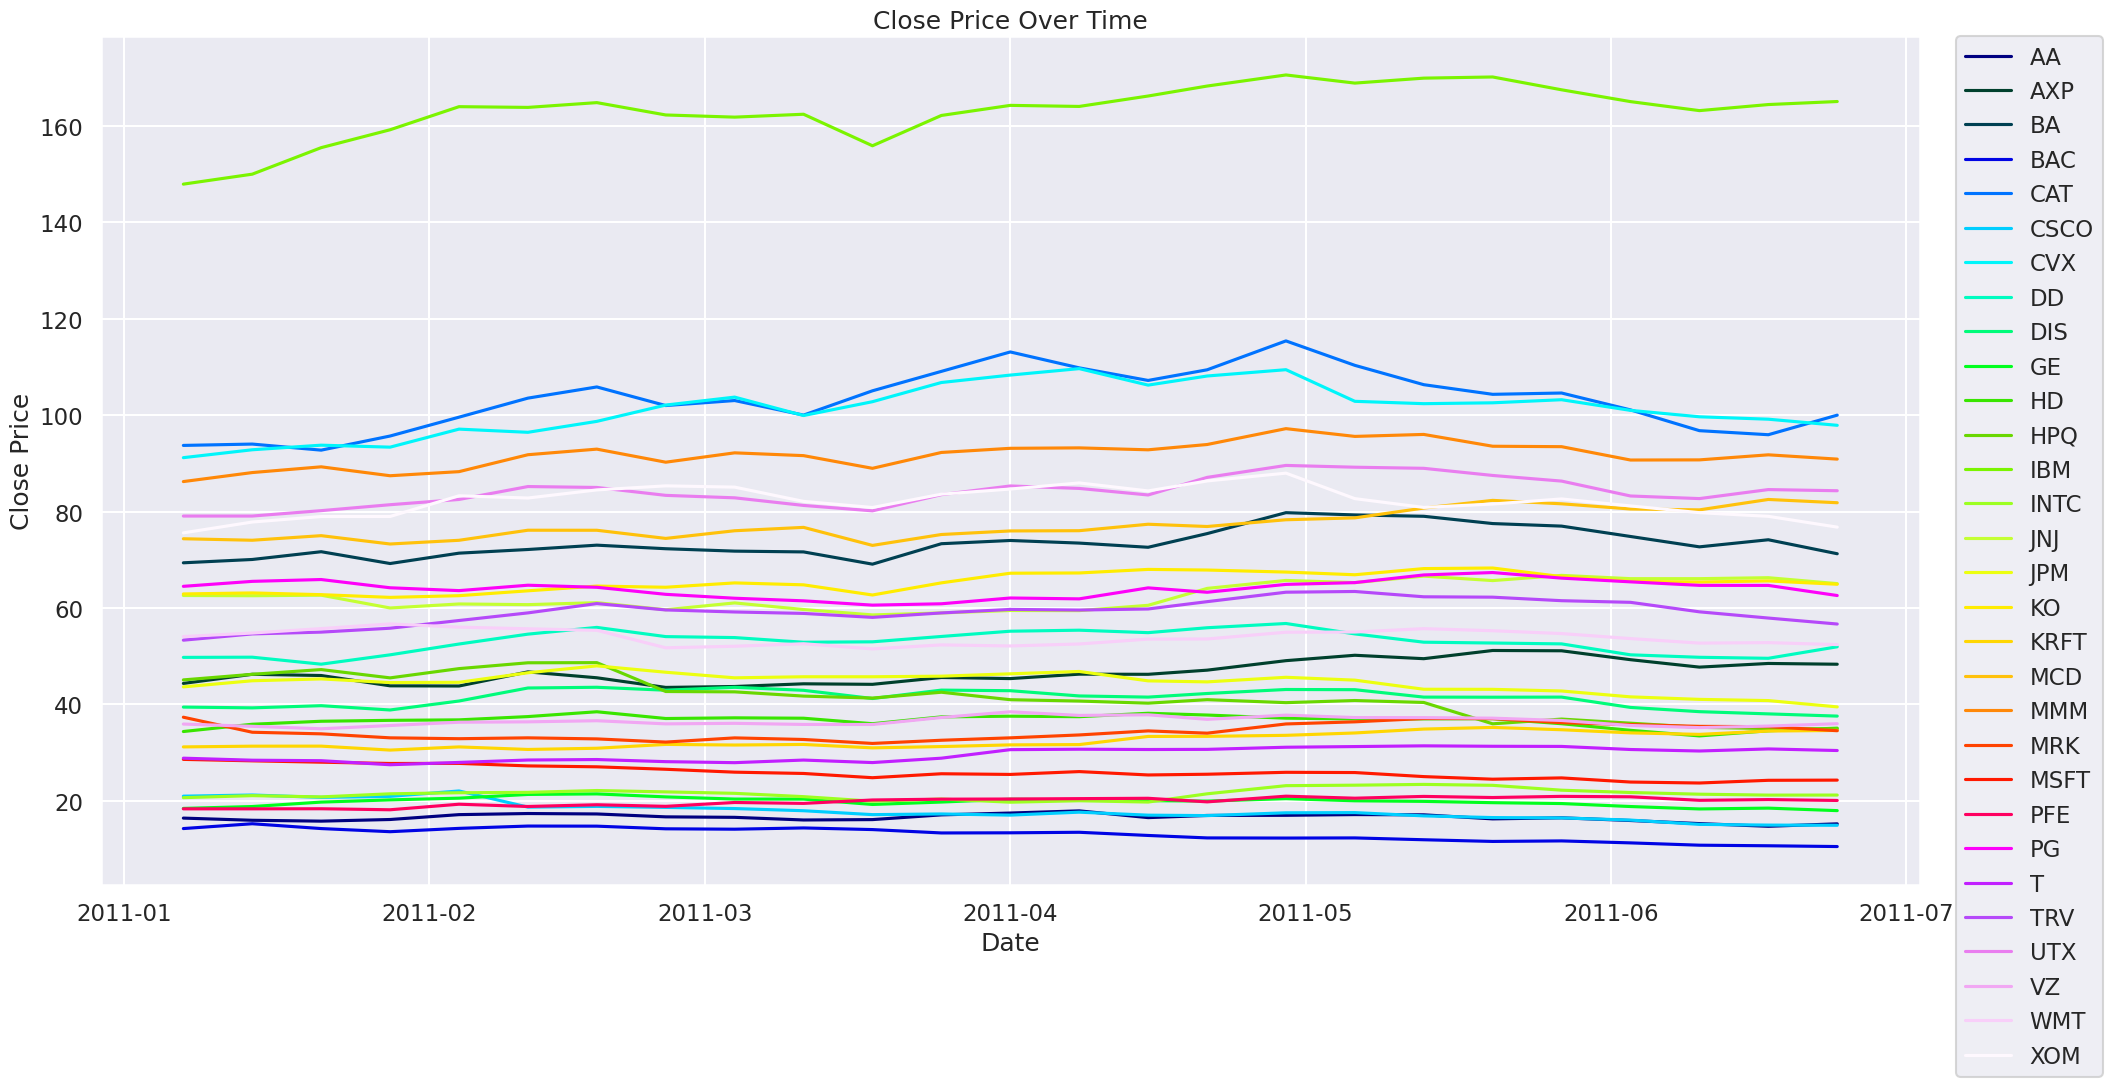

In [75]:
# Close price over time LINE PLOT
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by=['stock','date'], inplace=True)
unique_stocks = df['stock'].unique()
cmap = plt.cm.get_cmap('gist_ncar', len(unique_stocks))

plt.figure(figsize=(20,10))
for i, sym in enumerate(unique_stocks):
    df_sym = df[df['stock'] == sym]
    plt.plot(df_sym['date'], df_sym['close'], color=cmap(i), label=sym)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

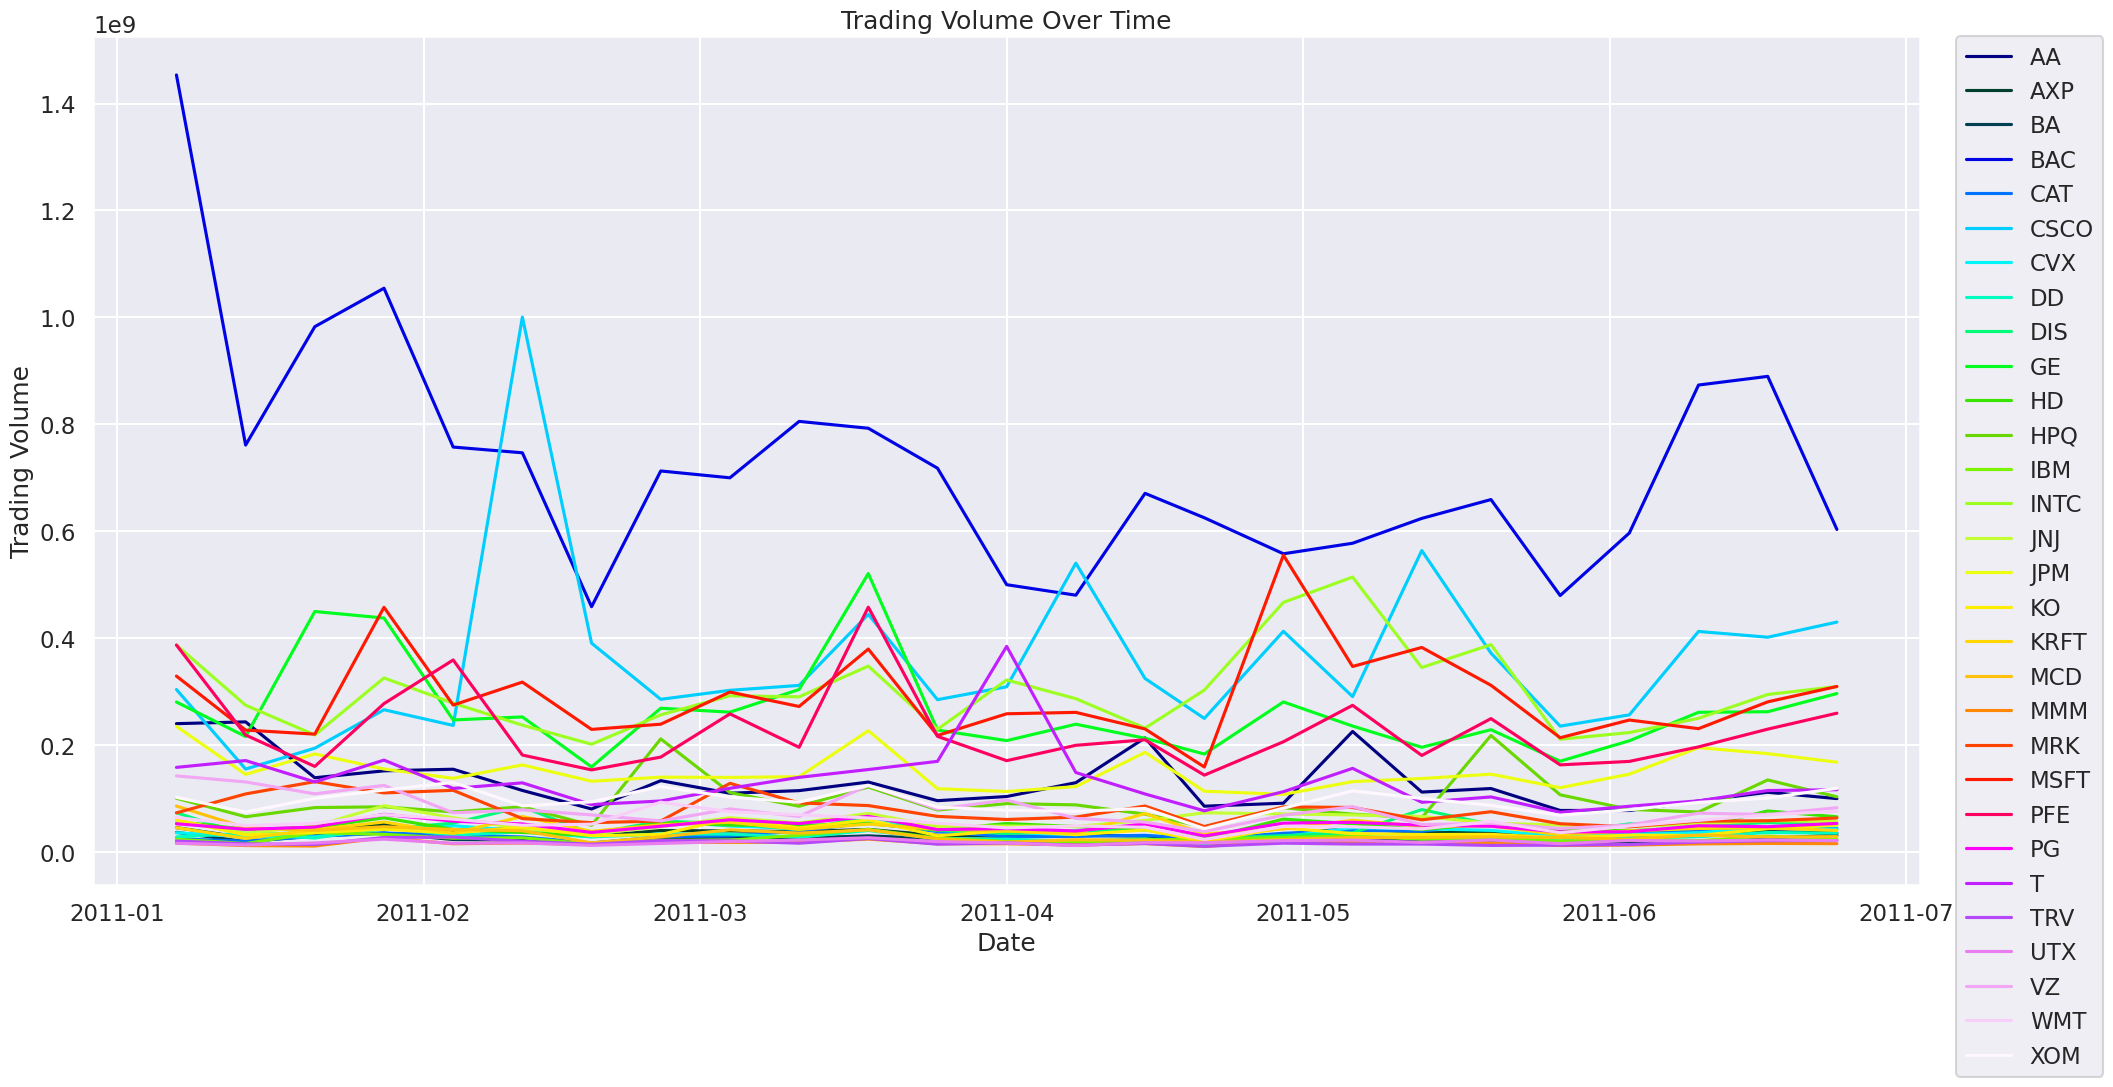

In [76]:
# Trading volume over time LINE PLOT
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by=['stock','date'], inplace=True)
unique_stocks = df['stock'].unique()
cmap = plt.cm.get_cmap('gist_ncar', len(unique_stocks))

plt.figure(figsize=(20,10))
for i, sym in enumerate(unique_stocks):
    df_sym = df[df['stock'] == sym]
    plt.plot(df_sym['date'], df_sym['volume'], color=cmap(i), label=sym)

plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Trading Volume Over Time')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

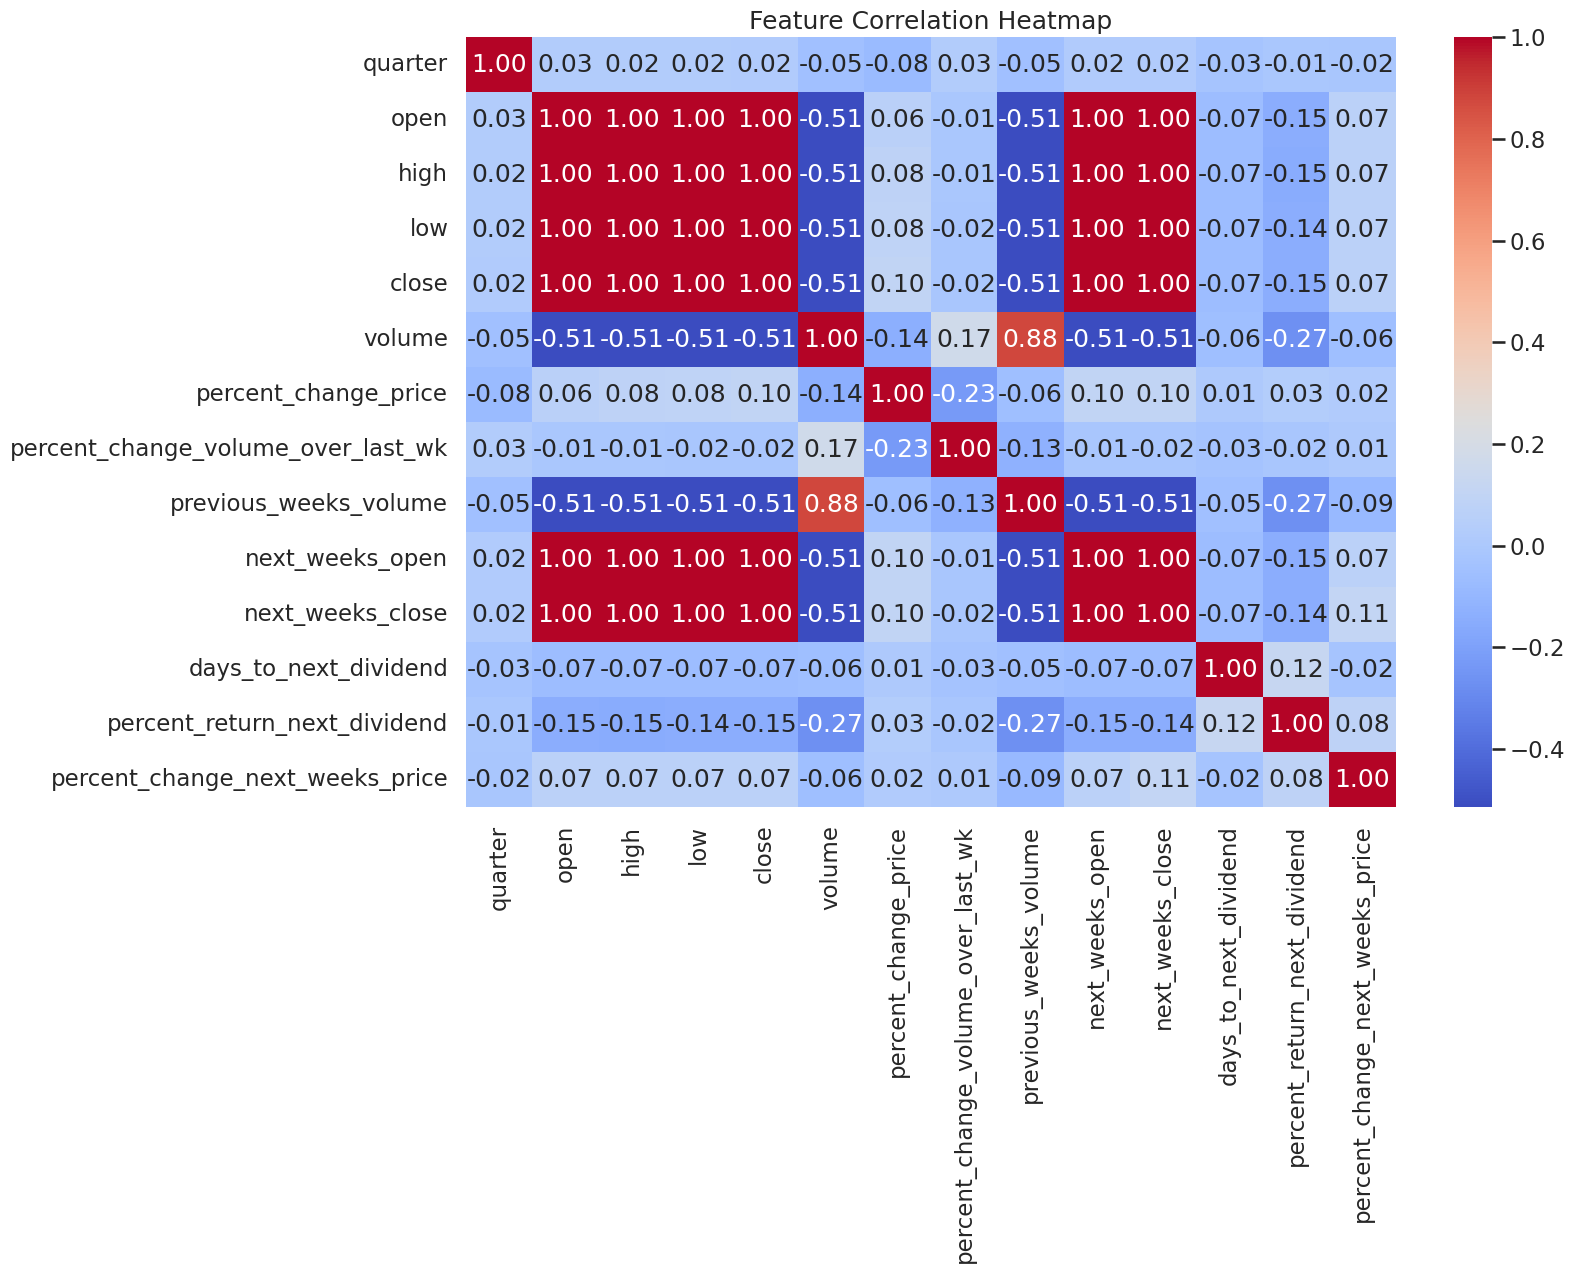

In [77]:
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#**1st Agent:**

In [78]:
# Naive Bayesian Model
# Predict "Up/Down/Stable" based on open price, percent_change_price
# open, close

In [79]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

In [80]:
import random
class BayesianNetwork:
    def __init__(self, nodes):
        self.nodes = nodes  # List of nodes (variables)
        self.parents = {node: [] for node in nodes}  # Parent relationships
        self.cpt = {}  # Store CPT per stock

    def add_edge(self, parent, child):
        """Define dependency relationships between nodes."""
        self.parents[child].append(parent)

    def set_cpt(self, stock, cpt):
        """Set the conditional probability table, specific to a stock."""
        if stock not in self.cpt:
            self.cpt[stock] = {}
        self.cpt[stock] = cpt

    def get_probability(self, stock, evidence):
        """Compute the probability of a node given the evidence and stock-specific CPT."""
        if stock not in self.cpt:
            return 1/3  # Return 1/3 probability if stock CPT is missing

        # Compute conditional probability using Bayes' Theorem
        key = tuple(evidence.values())
        probabilities = {}
        # If evidence is not in CPT, return 1/3 for each key of market trend
        # Else return the {market_trend,P(market_trend|evidences)
        if key not in self.cpt[stock]:
          probabilities = {k: 1/3 for k in ['Low', 'High', 'Medium']}
        else:
          for k, p in self.cpt[stock][key].items():
            probabilities[k] = p
        return probabilities

    def infer(self, stock, evidence):
      """Perform inference to determine the most likely market trend for a given stock."""
      probabilities = self.get_probability(stock, evidence)

      # Get max probability value
      max_prob = max(probabilities.values())

      # Get all trends that share the max probability
      best_trends = [k for k, v in probabilities.items() if v == max_prob]

      if len(best_trends) == 3:
          return 'Neutral'
      elif len(best_trends) == 2:
        if 'Bearish' in best_trends and 'Bullish' in best_trends:
          return random.choice(best_trends)
        elif 'Bearish' in best_trends and 'Neutral' in best_trends:
          return 'Bearish'
        else:
          return 'Neutral'
      else:
          return best_trends[0]  # Return the single best trend

    def suggested_decision(self, MarketTrend_pred):
      if MarketTrend_pred == 'Bearish':
        return 'Sell'
      elif MarketTrend_pred == 'Bullish':
        return 'Buy'
      else:
        return 'Hold'

In [81]:
# Compute new CPTs per stock
cpt_market_trend_per_stock = {}

# Group data by stock and compute probabilities
grouped = train_df.groupby("stock")

for stock, stock_df in grouped:
    # Compute joint frequency counts
    joint_counts = stock_df.groupby(['VolumeChange', 'PriceChange', 'MarketTrend']).size()

    # Compute conditional probabilities P(MarketTrend | VolumeChange, PriceChange)
    cpt_stock = joint_counts.div(joint_counts.groupby(level=[0, 1]).transform('sum')).unstack().fillna(0).to_dict()
    print(cpt_stock)
    # Store CPT for this stock
    cpt_market_trend_per_stock[stock] = cpt_stock

# Display newly computed CPTs per stock
cpt_market_trend_per_stock

{'Bearish': {('Down', 'Down'): 0.0, ('Down', 'Stable'): 0.75, ('Down', 'Up'): 0.25, ('Stable', 'Down'): 1.0, ('Up', 'Down'): 0.16666666666666666, ('Up', 'Stable'): 0.0, ('Up', 'Up'): 0.4}, 'Bullish': {('Down', 'Down'): 1.0, ('Down', 'Stable'): 0.0, ('Down', 'Up'): 0.5, ('Stable', 'Down'): 0.0, ('Up', 'Down'): 0.5, ('Up', 'Stable'): 0.0, ('Up', 'Up'): 0.4}, 'Neutral': {('Down', 'Down'): 0.0, ('Down', 'Stable'): 0.25, ('Down', 'Up'): 0.25, ('Stable', 'Down'): 0.0, ('Up', 'Down'): 0.3333333333333333, ('Up', 'Stable'): 1.0, ('Up', 'Up'): 0.2}}
{'Bearish': {('Down', 'Down'): 1.0, ('Down', 'Stable'): 0.16666666666666666, ('Down', 'Up'): 0.0, ('Up', 'Down'): 0.0, ('Up', 'Stable'): 0.25, ('Up', 'Up'): 0.25}, 'Bullish': {('Down', 'Down'): 0.0, ('Down', 'Stable'): 0.5, ('Down', 'Up'): 0.5, ('Up', 'Down'): 0.0, ('Up', 'Stable'): 0.25, ('Up', 'Up'): 0.25}, 'Neutral': {('Down', 'Down'): 0.0, ('Down', 'Stable'): 0.3333333333333333, ('Down', 'Up'): 0.5, ('Up', 'Down'): 1.0, ('Up', 'Stable'): 0.5, ('U

{'AA': {'Bearish': {('Down', 'Down'): 0.0,
   ('Down', 'Stable'): 0.75,
   ('Down', 'Up'): 0.25,
   ('Stable', 'Down'): 1.0,
   ('Up', 'Down'): 0.16666666666666666,
   ('Up', 'Stable'): 0.0,
   ('Up', 'Up'): 0.4},
  'Bullish': {('Down', 'Down'): 1.0,
   ('Down', 'Stable'): 0.0,
   ('Down', 'Up'): 0.5,
   ('Stable', 'Down'): 0.0,
   ('Up', 'Down'): 0.5,
   ('Up', 'Stable'): 0.0,
   ('Up', 'Up'): 0.4},
  'Neutral': {('Down', 'Down'): 0.0,
   ('Down', 'Stable'): 0.25,
   ('Down', 'Up'): 0.25,
   ('Stable', 'Down'): 0.0,
   ('Up', 'Down'): 0.3333333333333333,
   ('Up', 'Stable'): 1.0,
   ('Up', 'Up'): 0.2}},
 'AXP': {'Bearish': {('Down', 'Down'): 1.0,
   ('Down', 'Stable'): 0.16666666666666666,
   ('Down', 'Up'): 0.0,
   ('Up', 'Down'): 0.0,
   ('Up', 'Stable'): 0.25,
   ('Up', 'Up'): 0.25},
  'Bullish': {('Down', 'Down'): 0.0,
   ('Down', 'Stable'): 0.5,
   ('Down', 'Up'): 0.5,
   ('Up', 'Down'): 0.0,
   ('Up', 'Stable'): 0.25,
   ('Up', 'Up'): 0.25},
  'Neutral': {('Down', 'Down'): 0.0,


In [82]:
# Transform CPT format from {stock: {market: {(volume, price): P}}}
# to {stock: {(volume, price): {market: P}}}
cpt_transformed = {}

# Iterate over each stock's CPT
for stock, market_trend_dict in cpt_market_trend_per_stock.items():
    transformed_cpt = {}  # Dictionary to store the new structure for this stock

    for market, vp_dict in market_trend_dict.items():
        for (volume, price), prob in vp_dict.items():
            if (volume, price) not in transformed_cpt:
                transformed_cpt[(volume, price)] = {}
            transformed_cpt[(volume, price)][market] = prob  # Rearrange structure

    cpt_transformed[stock] = transformed_cpt  # Store the transformed CPT for the stock

# Display the transformed CPT structure
cpt_transformed

{'AA': {('Down', 'Down'): {'Bearish': 0.0, 'Bullish': 1.0, 'Neutral': 0.0},
  ('Down', 'Stable'): {'Bearish': 0.75, 'Bullish': 0.0, 'Neutral': 0.25},
  ('Down', 'Up'): {'Bearish': 0.25, 'Bullish': 0.5, 'Neutral': 0.25},
  ('Stable', 'Down'): {'Bearish': 1.0, 'Bullish': 0.0, 'Neutral': 0.0},
  ('Up', 'Down'): {'Bearish': 0.16666666666666666,
   'Bullish': 0.5,
   'Neutral': 0.3333333333333333},
  ('Up', 'Stable'): {'Bearish': 0.0, 'Bullish': 0.0, 'Neutral': 1.0},
  ('Up', 'Up'): {'Bearish': 0.4, 'Bullish': 0.4, 'Neutral': 0.2}},
 'AXP': {('Down', 'Down'): {'Bearish': 1.0, 'Bullish': 0.0, 'Neutral': 0.0},
  ('Down', 'Stable'): {'Bearish': 0.16666666666666666,
   'Bullish': 0.5,
   'Neutral': 0.3333333333333333},
  ('Down', 'Up'): {'Bearish': 0.0, 'Bullish': 0.5, 'Neutral': 0.5},
  ('Up', 'Down'): {'Bearish': 0.0, 'Bullish': 0.0, 'Neutral': 1.0},
  ('Up', 'Stable'): {'Bearish': 0.25, 'Bullish': 0.25, 'Neutral': 0.5},
  ('Up', 'Up'): {'Bearish': 0.25, 'Bullish': 0.25, 'Neutral': 0.5}},
 'B

In [83]:
# Training model
# Define nodes: Market trend prediction
nodes = ["MarketTrend", "VolumeChange", "PriceChange"]
# Create Bayesian Network
bn = BayesianNetwork(nodes)
# Define dependencies
bn.add_edge("VolumeChange", "MarketTrend")
bn.add_edge("PriceChange", "MarketTrend")

# Assign CPTs for each stock
for stock, cpt in cpt_transformed.items():
  bn.set_cpt(stock, cpt)


In [84]:
# Testing model
predictions = []
decisions = []
real_trends = []
result = pd.DataFrame()
for stock, VolumeChange, PriceChange in tuple(test_df[['stock', 'VolumeChange', 'PriceChange']].itertuples(index=False, name=None)):
  evidence = {"VolumeChange": VolumeChange, "PriceChange": PriceChange}
  MarketTrend_pred = bn.infer(stock, evidence)
  decision = bn.suggested_decision(MarketTrend_pred)
  predictions.append(MarketTrend_pred)
  decisions.append(decision)

result['predict_trend'] = predictions
result['decision'] = decisions
result['real_trend'] = test_df['MarketTrend'].tolist()

In [85]:
result['predict_trend'].unique()

array(['Bullish', 'Neutral', 'Bearish'], dtype=object)

In [86]:
# Find Accuracy
correct_predictions = (result['real_trend'] == result['predict_trend']).sum()
total_predictions = result['real_trend'].size
accuracy = correct_predictions / total_predictions
accuracy

0.41333333333333333